# Initialization

In [2]:
 import json

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import os

In [6]:
Quiz_Endpoint="LLQT.json"
Quiz_Submission="rJvd7g.json"
API_Endpoint="XgAgFJ.json"


In [7]:
def load_json(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

## Quiz Endpoint

In [9]:
quiz_data = load_json(Quiz_Endpoint)

print(type(quiz_data))
print(quiz_data.keys())

<class 'dict'>
dict_keys(['quiz'])


In [10]:
df_quiz = pd.read_json(Quiz_Endpoint)
print(df_quiz.head())  

                                               quiz
banner_id                                      None
coin_count                                       -1
correct_answer_marks                            4.0
created_at            2024-07-03T11:00:08.958+05:30
daily_date                         January 17, 2025


In [11]:
print("Quiz ID:", df_quiz['quiz']['id'])
print("Topic:", df_quiz['quiz']['topic'])
print("Total Questions:", df_quiz['quiz']['questions_count'])
print("Duration:", df_quiz['quiz']['duration'])
print("Is Published:", df_quiz['quiz']['is_published'])

Quiz ID: 43
Topic: Structural Organisation in Animals
Total Questions: 128
Duration: 128
Is Published: True


## Quiz Submission

In [13]:
submission_data = load_json(Quiz_Submission)

print(type(submission_data))
print(submission_data.keys())

<class 'dict'>
dict_keys(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at', 'score', 'trophy_level', 'accuracy', 'speed', 'final_score', 'negative_score', 'correct_answers', 'incorrect_answers', 'source', 'type', 'started_at', 'ended_at', 'duration', 'better_than', 'total_questions', 'rank_text', 'mistakes_corrected', 'initial_mistake_count', 'response_map', 'quiz', 'next_steps'])


In [14]:
# Flattens
df_submission = pd.json_normalize(submission_data)
print(df_submission.columns)

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'next_steps', 'response_map.1837',
       'response_map.1848', 'response_map.1852', 'response_map.1862',
       'response_map.1877', 'response_map.1878', 'response_map.1900',
       'response_map.1917', 'response_map.1934', 'response_map.1964',
       'quiz.id', 'quiz.name', 'quiz.title', 'quiz.description',
       'quiz.difficulty_level', 'quiz.topic', 'quiz.time', 'quiz.is_published',
       'quiz.created_at', 'quiz.updated_at', 'quiz.duration', 'quiz.end_time',
       'quiz.negative_marks', 'quiz.correct_answer_marks', 'quiz.shuffle',
       'quiz.show_answers', 'quiz.lock_solutions', 'quiz.is_form',
      

In [15]:
print("Quiz ID:",df_submission['quiz_id'].iloc[0])
print("User ID:", df_submission['user_id'].iloc[0]) 
print("Score:", df_submission['score'].iloc[0]) 


Quiz ID: 43
User ID: 7ZXdz3zHuNcdg9agb5YpaOGLQqw2
Score: 32


In [16]:
df_submission = pd.json_normalize(submission_data)  # Submission data
quiz_data = submission_data.get("quiz", {})  # Extract nested quiz data

# Add 'topic' explicitly to the DataFrame
df_submission['quiz.topic'] = quiz_data.get("topic", None)

# Verify the column
print("Submission Data Columns:", df_submission.columns)


Submission Data Columns: Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'next_steps', 'response_map.1837',
       'response_map.1848', 'response_map.1852', 'response_map.1862',
       'response_map.1877', 'response_map.1878', 'response_map.1900',
       'response_map.1917', 'response_map.1934', 'response_map.1964',
       'quiz.id', 'quiz.name', 'quiz.title', 'quiz.description',
       'quiz.difficulty_level', 'quiz.topic', 'quiz.time', 'quiz.is_published',
       'quiz.created_at', 'quiz.updated_at', 'quiz.duration', 'quiz.end_time',
       'quiz.negative_marks', 'quiz.correct_answer_marks', 'quiz.shuffle',
       'quiz.show_answers', 'quiz.lock_solutions

## Historical API Endpoint

In [18]:
history_data = load_json(API_Endpoint)

print(type(history_data))


<class 'list'>


In [19]:
df_history = pd.read_json(API_Endpoint)
print(df_history.head())  

       id  quiz_id                       user_id  \
0  336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
1  336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
2  333330       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
3  333242        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
4  329504       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   

                      submitted_at                       created_at  \
0 2025-01-17 15:30:18.027000+05:30 2025-01-17 15:30:18.044000+05:30   
1 2025-01-17 15:17:44.042000+05:30 2025-01-17 15:17:44.056000+05:30   
2 2025-01-16 20:13:19.682000+05:30 2025-01-16 20:13:19.699000+05:30   
3 2025-01-16 20:00:11.562000+05:30 2025-01-16 20:00:11.573000+05:30   
4 2025-01-15 20:34:39.462000+05:30 2025-01-15 20:34:39.478000+05:30   

                        updated_at  score  trophy_level accuracy  speed  ...  \
0 2025-01-17 15:30:18.044000+05:30    108             2     90 %    100  ...   
1 2025-01-17 15:17:44.056000+05:30     92             1    100 %    100  ...   
2 2025-01-16 20:13:1

# Analyzing the Data

In [21]:
# Convert JSON to DataFrame
df_quiz = pd.json_normalize(quiz_data)
df_submission = pd.json_normalize(submission_data)
df_history = pd.json_normalize(history_data)

In [22]:

# Display basic info
print("Quiz Data Columns:", df_quiz.columns)
print("Submission Data Columns:", df_submission.columns)
print("Historical Data Columns:", df_history.columns)

Quiz Data Columns: Index(['id', 'name', 'title', 'description', 'difficulty_level', 'topic',
       'time', 'is_published', 'created_at', 'updated_at', 'duration',
       'end_time', 'negative_marks', 'correct_answer_marks', 'shuffle',
       'show_answers', 'lock_solutions', 'is_form', 'show_mastery_option',
       'reading_material', 'quiz_type', 'is_custom', 'banner_id', 'exam_id',
       'show_unanswered', 'ends_at', 'lives', 'live_count', 'coin_count',
       'questions_count', 'daily_date', 'max_mistake_count',
       'reading_materials'],
      dtype='object')
Submission Data Columns: Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'next_steps', 'res

In [47]:
current_quiz_questions = submission_data['quiz']['questions']
current_response_map = submission_data['response_map']

In [49]:
historical_quiz_topics = [quiz['quiz']['topic'] for quiz in history_data]
historical_response_maps = [quiz['response_map'] for quiz in history_data]
historical_scores = [quiz['score'] for quiz in history_data]
historical_accuracies = [quiz['accuracy'] for quiz in history_data]

In [53]:
topic_accuracy = {}
for quiz in history_data:
    topic = quiz['quiz']['topic']
    correct_answers = quiz['correct_answers']
    total_questions = quiz['total_questions']
    accuracy = correct_answers / total_questions if total_questions > 0 else 0
    if topic not in topic_accuracy:
        topic_accuracy[topic] = []
    topic_accuracy[topic].append(accuracy)

In [55]:
topic_accuracy_summary = {topic: sum(accs) / len(accs) for topic, accs in topic_accuracy.items()}

In [57]:
current_quiz_summary = {
    "Total Questions": len(current_quiz_questions),
    "Correct Answers": submission_data['correct_answers'],
    "Incorrect Answers": submission_data['incorrect_answers'],
    "Accuracy (%)": submission_data['accuracy'],
}


In [59]:
difficulty_levels = {}
for question in current_quiz_questions:
    difficulty = question.get('difficulty_level', 'Unknown')
    if difficulty not in difficulty_levels:
        difficulty_levels[difficulty] = 0
    difficulty_levels[difficulty] += 1

In [61]:
analysis_results = {
    "Current Quiz Summary": current_quiz_summary,
    "Historical Topic Accuracy Summary": topic_accuracy_summary,
    "Question Difficulty Distribution": difficulty_levels,
    "Historical Performance Trends": {
        "Scores": historical_scores,
        "Accuracies": historical_accuracies,
    },
}

In [63]:
print("Analysis Results:")
print(json.dumps(analysis_results, indent=4))

Analysis Results:
{
    "Current Quiz Summary": {
        "Total Questions": 0,
        "Correct Answers": 8,
        "Incorrect Answers": 2,
        "Accuracy (%)": "80 %"
    },
    "Historical Topic Accuracy Summary": {
        "Body Fluids and Circulation": 0.21666666666666667,
        "Body Fluids and Circulation ": 0.5942028985507246,
        "Human Reproduction": 0.11235955056179775,
        "principles of inheritance and variation ": 0.05084745762711865,
        "microbes in human welfare": 0.95,
        "reproductive health ": 0.5909090909090909,
        "human health and disease ": 0.6829268292682927,
        "Reproductive Health": 0.23636363636363636,
        "Respiration and Gas Exchange": 0.06
    },
    "Question Difficulty Distribution": {},
    "Historical Performance Trends": {
        "Scores": [
            108,
            92,
            116,
            36,
            36,
            40,
            36,
            12,
            76,
            40,
            

# Data Visualization

In [69]:
scores = historical_scores
accuracies = [float(acc.strip('%')) for acc in historical_accuracies if isinstance(acc, str)]

In [73]:
topics = list(topic_accuracy_summary.keys())
accuracies_by_topic = [accuracy * 100 for accuracy in topic_accuracy_summary.values()]

In [75]:
difficulty_labels = list(difficulty_levels.keys())
difficulty_counts = list(difficulty_levels.values())

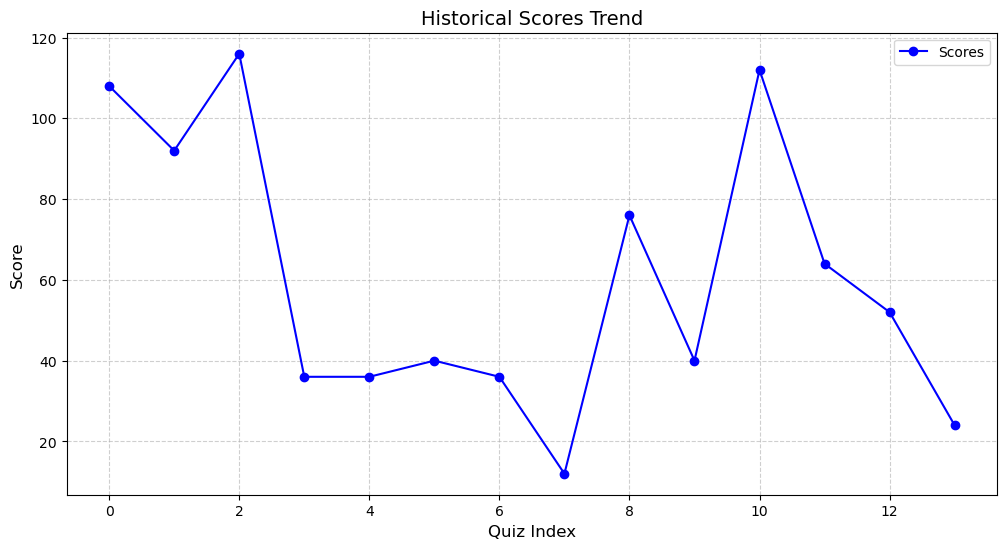

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(scores)), scores, marker='o', label='Scores', color='b')
plt.title("Historical Scores Trend", fontsize=14)
plt.xlabel("Quiz Index", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


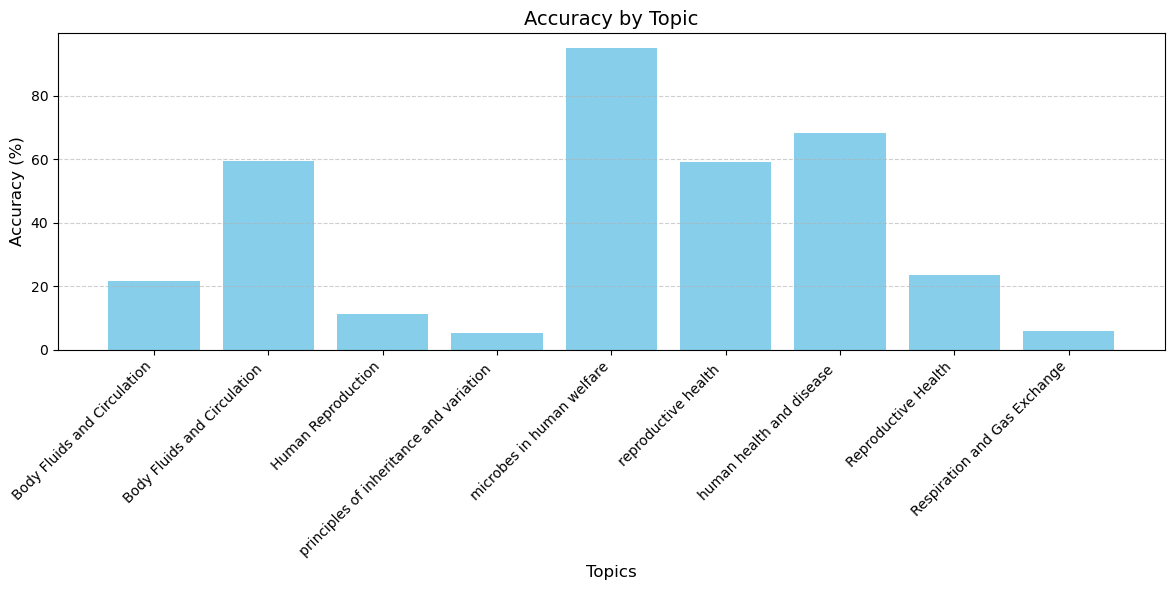

In [78]:
plt.figure(figsize=(12, 6))
plt.bar(topics, accuracies_by_topic, color='skyblue')
plt.title("Accuracy by Topic", fontsize=14)
plt.xlabel("Topics", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
